# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [1]:
import pandas as pd
import seaborn as sns

## Leemos nuestro archivo de entrada `reviews_sentiment`

Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

In [3]:
df = pd.read_csv("data/reviews_sentiment.csv", sep=";")
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [5]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


In [6]:
df["Star Rating"].value_counts()

Star Rating
5    88
3    78
1    37
4    30
2    24
Name: count, dtype: int64

array([[<Axes: title={'center': 'wordcount'}>,
        <Axes: title={'center': 'Star Rating'}>],
       [<Axes: title={'center': 'sentimentValue'}>, <Axes: >]],
      dtype=object)

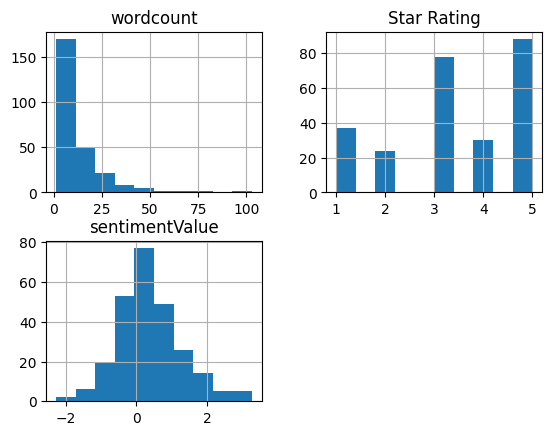

In [7]:
df.hist()

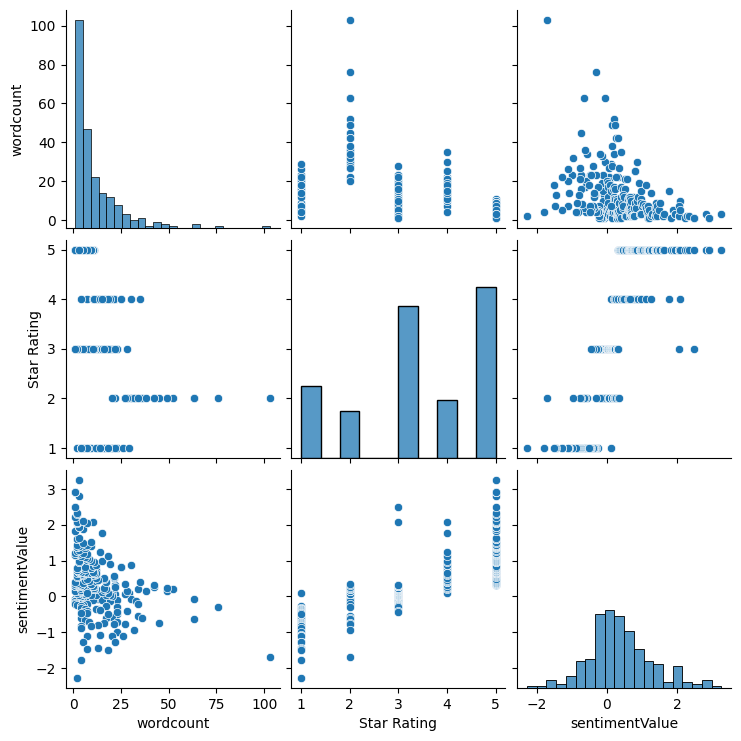

In [8]:
sns.pairplot(df)

<Axes: >

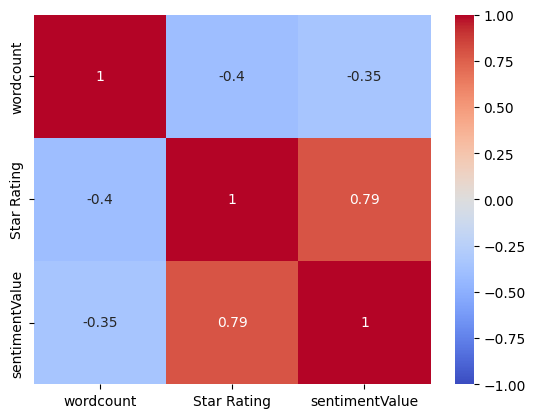

In [9]:
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap="coolwarm", vmin=-1)

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [11]:
X = df[["wordcount", "sentimentValue"]]
y= df["Star Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(205, 2)
(205,)
(52, 2)
(52,)


In [16]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

print(X_train_scaler.max())
print(X_train_scaler.min())

print(X_test_scaler.max())
print(X_test_scaler.min())



1.0
0.0
0.9386062900026317
0.0


## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaler, y_train)

KNeighborsClassifier()

## Evalúa tu modelo

In [19]:
pred_train = knn.predict(X_train_scaler)
pred_test = knn.predict(X_test_scaler)

print("Accuracy: ", metrics.accuracy_score(y_train, pred_train))
print("matriz: ", metrics.confusion_matrix(y_train, pred_train))

print("Accuracy: ", metrics.accuracy_score(y_test, pred_test))
print("matriz: ", metrics.confusion_matrix(y_test, pred_test))

Accuracy:  0.9365853658536586
matriz:  [[28  0  1  0  0]
 [ 1 16  1  0  0]
 [ 1  1 58  1  2]
 [ 0  0  2 18  3]
 [ 0  0  0  0 72]]
Accuracy:  0.8461538461538461
matriz:  [[ 7  1  0  0  0]
 [ 0  5  1  0  0]
 [ 1  0 14  0  0]
 [ 0  1  2  3  1]
 [ 0  0  1  0 15]]


In [24]:
df["Star Rating"].value_counts()

Star Rating
5    88
3    78
1    37
4    30
2    24
Name: count, dtype: int64

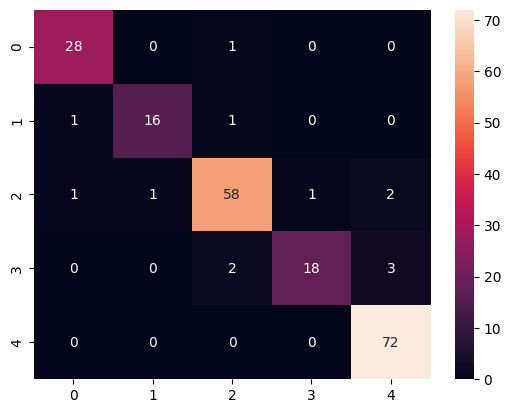

In [22]:
sns.heatmap(metrics.confusion_matrix(y_train, pred_train), annot=True);

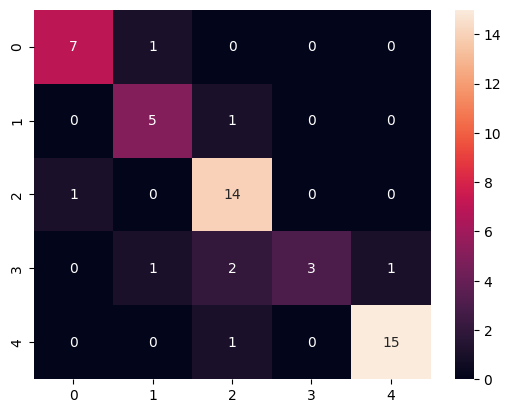

In [23]:
sns.heatmap(metrics.confusion_matrix(y_test, pred_test), annot=True);

In [25]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           1       0.93      0.97      0.95        29
           2       0.94      0.89      0.91        18
           3       0.94      0.92      0.93        63
           4       0.95      0.78      0.86        23
           5       0.94      1.00      0.97        72

    accuracy                           0.94       205
   macro avg       0.94      0.91      0.92       205
weighted avg       0.94      0.94      0.94       205



In [26]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.71      0.83      0.77         6
           3       0.78      0.93      0.85        15
           4       1.00      0.43      0.60         7
           5       0.94      0.94      0.94        16

    accuracy                           0.85        52
   macro avg       0.86      0.80      0.81        52
weighted avg       0.86      0.85      0.84        52



## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [27]:
import numpy as np

In [37]:
parametros = {"n_neighbors":np.arange(3,30,2)}
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, parametros, cv = 5, scoring="accuracy", verbose=3)
knn_grid.fit(X_train_scaler, y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.878 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.732 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.854 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.927 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.829 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.878 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;, score=0.756 total time=   0.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.854 total time=   0.0s
[CV 4/5] END .....................n_neighbors=5;, score=0.902 total time=   0.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.854 total time=   0.0s
[CV 1/5] END .....................n_neighbors=7;, score=0.878 total time=   0.0s
[CV 2/5] END .....................n_neighbors=7;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             scoring='accuracy', verbose=3)

In [38]:
print(knn_grid.best_estimator_)
print(knn_grid.best_score_)


KNeighborsClassifier(n_neighbors=np.int64(7))
0.853658536585366


In [39]:
knn = knn_grid.best_estimator_

pred_grid = knn.predict(X_test_scaler)

print("Accuracy: ", metrics.accuracy_score(y_test, pred_grid))


Accuracy:  0.8076923076923077


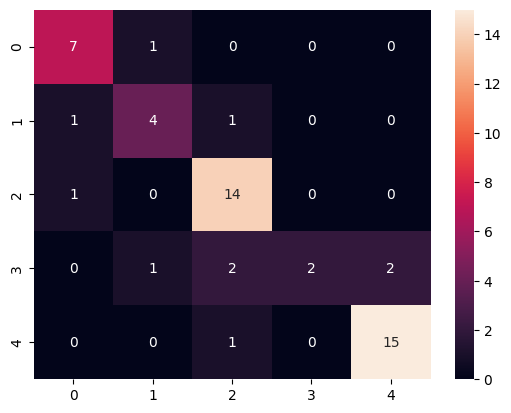

In [40]:
sns.heatmap(metrics.confusion_matrix(y_test, pred_grid), annot=True);

In [42]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.71      0.83      0.77         6
           3       0.78      0.93      0.85        15
           4       1.00      0.43      0.60         7
           5       0.94      0.94      0.94        16

    accuracy                           0.85        52
   macro avg       0.86      0.80      0.81        52
weighted avg       0.86      0.85      0.84        52



In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = (
    ("scaler", MinMaxScaler()),
    ("classifier", KNeighborsClassifier())
))
parametros = {
    "scaler": [MinMaxScaler(), StandardScaler(), None],
    "classifier__n_neighbors":np.arange(3,30),
}

knn_grid = GridSearchCV(pipe, parametros, cv= 7, scoring="accuracy", verbose=3)

knn_grid.fit(X_train_scaler, y_train)

Fitting 7 folds for each of 81 candidates, totalling 567 fits
[CV 1/7] END classifier__n_neighbors=3, scaler=MinMaxScaler();, score=0.900 total time=   0.0s
[CV 2/7] END classifier__n_neighbors=3, scaler=MinMaxScaler();, score=0.767 total time=   0.0s
[CV 3/7] END classifier__n_neighbors=3, scaler=MinMaxScaler();, score=0.828 total time=   0.0s
[CV 4/7] END classifier__n_neighbors=3, scaler=MinMaxScaler();, score=0.931 total time=   0.0s
[CV 5/7] END classifier__n_neighbors=3, scaler=MinMaxScaler();, score=0.828 total time=   0.0s
[CV 6/7] END classifier__n_neighbors=3, scaler=MinMaxScaler();, score=0.931 total time=   0.0s
[CV 7/7] END classifier__n_neighbors=3, scaler=MinMaxScaler();, score=0.793 total time=   0.0s
[CV 1/7] END classifier__n_neighbors=3, scaler=StandardScaler();, score=0.900 total time=   0.0s
[CV 2/7] END classifier__n_neighbors=3, scaler=StandardScaler();, score=0.767 total time=   0.0s
[CV 3/7] END classifier__n_neighbors=3, scaler=StandardScaler();, score=0.828 t

GridSearchCV(cv=7,
             estimator=Pipeline(steps=(('scaler', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier()))),
             param_grid={'classifier__n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'scaler': [MinMaxScaler(), StandardScaler(), None]},
             scoring='accuracy', verbose=3)

In [49]:
print(knn_grid.best_estimator_)
print(knn_grid.best_score_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=np.int64(4)))])
0.8926108374384237


In [51]:
knn = knn_grid.best_estimator_
pred = knn.predict(X_test_scaler)


In [52]:
print("Accuracy: ", metrics.accuracy_score(y_test, pred))

Accuracy:  0.8269230769230769


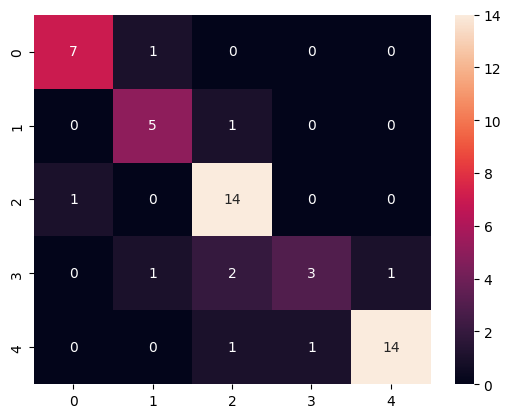

In [53]:
sns.heatmap(metrics.confusion_matrix(y_test, pred), annot=True);

In [54]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.71      0.83      0.77         6
           3       0.78      0.93      0.85        15
           4       0.75      0.43      0.55         7
           5       0.93      0.88      0.90        16

    accuracy                           0.83        52
   macro avg       0.81      0.79      0.79        52
weighted avg       0.83      0.83      0.82        52



## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [57]:
valores = [[20,1.5]]
X_scaler = scaler.transform(valores)
print(X_scaler)
pred = knn.predict(X_scaler)

print("tu rating es ", pred)

[[0.18627451 0.68154423]]
tu rating es  [4]


c:\Users\Diego Nuñez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
